In [1]:
from sentence_transformers import SentenceTransformer, util

import networkx as nx

model = SentenceTransformer('all-MiniLM-L6-v2')

import yake

import matplotlib.pyplot as plt

import re

from nltk.tokenize import sent_tokenize

In [82]:
from pyvis.network import Network

In [5]:
text = """Building a satellite and putting it in orbit was until very recently something only a nation had the resources to accomplish, and even then only a select few. Oh sure, there were a few amateur satellites that somehow managed to get built on a shoestring budget and hitch a ride into space, and while their stories are deservedly the stuff of legends, satellite construction took a very long time to be democratized.

Fast forward a half-dozen or so decades, and things have changed dramatically. Satellite launches are still complex affairs — it’s still rocket science, after all — but the advent of the CubeSat format and the increased tempo of launches, both national and commercial, has pushed the barriers to private, low-budget launches way, way down. So much so, in fact, that the phrase “space startup” is no longer something to snicker about.

join-hack-chatOne such group of space entrepreneurs is Quub, Inc., a small company in Lancaster, Pennsylvania which is looking to build and fly a constellation of microsatellites to monitor Earth’s environment in real-time. They’re building sats and signing launch deals using consumer-grade technology and modularized construction, and we’re lucky enough to have Nathaniel Evry, their Chief Research Officer, stop by the Hack Chat. If you’ve ever wondered what it takes to build hardware that can stand the rigors of launch and then perform a task in space, you’ll want to tune in for this one.

Our Hack Chats are live community events in the Hackaday.io Hack Chat group messaging. This week we’ll be sitting down on Wednesday, June 21 at 12:00 PM Pacific time. If time zones have you tied up, we have a handy time zone converter. Click that speech bubble to the right, and you’ll be taken directly to the Hack Chat group on Hackaday.io. You don’t have to wait until Wednesday; join whenever you want and you can see what the community is talking about."""

In [133]:
text2 = """Most video games, whether on console or PC, have standardized around either a keyboard and mouse or an analog controller of some sort, with very little differences between various offerings from the likes of Sony, Microsoft, Nintendo, or even Valve. This will get most of us through almost all video games, but for those looking to take their gameplay up a notch or who are playing much more complex games, certain specialized controllers are available, but they might not meet everyone’s specific needs. Thanks to this custom, modular keyboard anyone should be able to make exactly the controller they need.

The device features a grid of 15 interfaces where modules like buttons, potentiometers, encoders, and joysticks can be placed. Each module can be customized to a significant extent on their own, and they can be placed anywhere on the grid. The modules themselves can be assigned to trigger keyboard presses or gamepad motions depending on the needs of the user. A Raspberry Pi handles the inputs and translates them to the computer, so in that regard it functions no differently than a standard keyboard or gamepad would. Programming is done by sending commands via a USB serial port, with the ability to save various configurations as well.

The modular controller is open-source in terms of hardware and software, with easy assembly using through-hole components and a customizable 3D printed cover for anyone looking to make their own. The project’s creator [Daniel] had flight simulators in mind when designing the device, which often benefit from having more specialized controllers, but any game with lots of specific inputs from Starcraft to League of Legends could benefit from a custom controller or keyboard like this. Flight simulators are more often the targets of specialized and unique controls, though, like this custom yoke or this physical control panel."""

In [137]:
kw_extractor = yake.KeywordExtractor()

def build_network(text, threshold):
    
    assert isinstance(threshold, float), 'Please enter a float between 0 and 1 as the threshold'
#     assert threshold == float
    
    keywords = kw_extractor.extract_keywords(text)

    keywords = [kw[0] for kw in keywords]

    embs = model.encode(keywords)

    G = nx.Graph()

    G.add_nodes_from(keywords)

    cosine_scores = util.cos_sim(embs, embs)

    pairs = []
    for idx, x in enumerate(keywords):
        for idy, y in enumerate(keywords):
            if x !=y:
                pairs.append({'index': [x, y], 'score': round(float(cosine_scores[idx][idy]),4)})

    for pair in pairs:
        if pair['score']*5 >=threshold:
            G.add_edge(pair['index'][0], pair['index'][1], weight=pair['score']*5)
    
    ## Scale the nodes
    scale=2
    d = dict(G.degree)

    #Updating dict
    d.update((x, scale*y) for x, y in d.items())

    #Setting up size attribute
    nx.set_node_attributes(G,d,'size')
    
    return G


In [142]:
G.degree

DegreeView({'video games': 19, 'Microsoft': 19, 'Nintendo': 19, 'analog controller': 19, 'Sony': 19, 'Valve': 19, 'controller': 19, 'games': 19, 'keyboard': 19, 'specialized controllers': 19, 'video': 19, 'complex games': 19, 'sort': 19, 'specialized': 19, 'custom': 19, 'console': 19, 'standardized': 19, 'mouse': 19, 'analog': 19, 'differences': 19})

In [145]:
nx.density(G)

1.0

In [160]:
nx.eigenvector_centrality(G, weight='weight')

{'video games': 0.22360679774997896,
 'Microsoft': 0.22360679774997896,
 'Nintendo': 0.22360679774997896,
 'analog controller': 0.22360679774997896,
 'Sony': 0.22360679774997896,
 'Valve': 0.22360679774997896,
 'controller': 0.22360679774997896,
 'games': 0.22360679774997896,
 'keyboard': 0.22360679774997896,
 'specialized controllers': 0.22360679774997896,
 'video': 0.22360679774997896,
 'complex games': 0.22360679774997896,
 'sort': 0.22360679774997896,
 'specialized': 0.22360679774997896,
 'custom': 0.22360679774997896,
 'console': 0.22360679774997896,
 'standardized': 0.22360679774997896,
 'mouse': 0.22360679774997896,
 'analog': 0.22360679774997896,
 'differences': 0.22360679774997896}

In [159]:
nx.pagerank(G, weight='weight')

{'video games': 0.05000000000000001,
 'Microsoft': 0.05000000000000001,
 'Nintendo': 0.05000000000000001,
 'analog controller': 0.05000000000000001,
 'Sony': 0.05000000000000001,
 'Valve': 0.05000000000000001,
 'controller': 0.05000000000000001,
 'games': 0.05000000000000001,
 'keyboard': 0.05000000000000001,
 'specialized controllers': 0.05000000000000001,
 'video': 0.05000000000000001,
 'complex games': 0.05000000000000001,
 'sort': 0.05000000000000001,
 'specialized': 0.05000000000000001,
 'custom': 0.05000000000000001,
 'console': 0.05000000000000001,
 'standardized': 0.05000000000000001,
 'mouse': 0.05000000000000001,
 'analog': 0.05000000000000001,
 'differences': 0.05000000000000001}

In [161]:
nx.betweenness_centrality(G, weight='weight')

{'video games': 0.0,
 'Microsoft': 0.0,
 'Nintendo': 0.0,
 'analog controller': 0.0,
 'Sony': 0.0,
 'Valve': 0.0,
 'controller': 0.0,
 'games': 0.0,
 'keyboard': 0.0,
 'specialized controllers': 0.0,
 'video': 0.0,
 'complex games': 0.0,
 'sort': 0.0,
 'specialized': 0.0,
 'custom': 0.0,
 'console': 0.0,
 'standardized': 0.0,
 'mouse': 0.0,
 'analog': 0.0,
 'differences': 0.0}

In [168]:
G.nodes(data=True)

NodeDataView({'video games': {'size': 38}, 'Microsoft': {'size': 38}, 'Nintendo': {'size': 38}, 'analog controller': {'size': 38}, 'Sony': {'size': 38}, 'Valve': {'size': 38}, 'controller': {'size': 38}, 'games': {'size': 38}, 'keyboard': {'size': 38}, 'specialized controllers': {'size': 38}, 'video': {'size': 38}, 'complex games': {'size': 38}, 'sort': {'size': 38}, 'specialized': {'size': 38}, 'custom': {'size': 38}, 'console': {'size': 38}, 'standardized': {'size': 38}, 'mouse': {'size': 38}, 'analog': {'size': 38}, 'differences': {'size': 38}})

In [169]:
G.edges(data=True)

EdgeDataView([('video games', 'Microsoft', {'width': 1.8115}), ('video games', 'Nintendo', {'width': 2.943}), ('video games', 'analog controller', {'width': 0.9755}), ('video games', 'Sony', {'width': 1.9389999999999998}), ('video games', 'Valve', {'width': 1.6159999999999999}), ('video games', 'controller', {'width': 1.454}), ('video games', 'games', {'width': 3.8745000000000003}), ('video games', 'keyboard', {'width': 1.6415}), ('video games', 'specialized controllers', {'width': 1.2640000000000002}), ('video games', 'video', {'width': 1.935}), ('video games', 'complex games', {'width': 3.1580000000000004}), ('video games', 'sort', {'width': 1.35}), ('video games', 'specialized', {'width': 1.1385}), ('video games', 'custom', {'width': 1.036}), ('video games', 'console', {'width': 2.1959999999999997}), ('video games', 'standardized', {'width': 0.3755}), ('video games', 'mouse', {'width': 1.8215000000000001}), ('video games', 'analog', {'width': 1.6875}), ('video games', 'differences',

In [173]:
G.size()

190

In [171]:
nx.edge_current_flow_betweenness_centrality(G)#, weight = 'weight')

{('video games', 'Microsoft'): 0.005555555555555557,
 ('Nintendo', 'video games'): 0.005555555555555557,
 ('analog controller', 'video games'): 0.0055555555555555575,
 ('Sony', 'video games'): 0.005555555555555555,
 ('video games', 'Valve'): 0.005555555555555556,
 ('video games', 'controller'): 0.005555555555555556,
 ('games', 'video games'): 0.005555555555555555,
 ('keyboard', 'video games'): 0.005555555555555556,
 ('video games', 'specialized controllers'): 0.005555555555555557,
 ('video', 'video games'): 0.005555555555555557,
 ('complex games', 'video games'): 0.00555555555555556,
 ('sort', 'video games'): 0.0055555555555555575,
 ('specialized', 'video games'): 0.005555555555555555,
 ('video games', 'custom'): 0.0055555555555555575,
 ('video games', 'console'): 0.005555555555555557,
 ('standardized', 'video games'): 0.005555555555555558,
 ('video games', 'mouse'): 0.0055555555555555575,
 ('video games', 'analog'): 0.0055555555555555575,
 ('video games', 'differences'): 0.00555555555

In [167]:
nx.edge_betweenness_centrality(G, weight = 'weight')

{('video games', 'Microsoft'): 0.005263157894736842,
 ('video games', 'Nintendo'): 0.005263157894736842,
 ('video games', 'analog controller'): 0.005263157894736842,
 ('video games', 'Sony'): 0.005263157894736842,
 ('video games', 'Valve'): 0.005263157894736842,
 ('video games', 'controller'): 0.005263157894736842,
 ('video games', 'games'): 0.005263157894736842,
 ('video games', 'keyboard'): 0.005263157894736842,
 ('video games', 'specialized controllers'): 0.005263157894736842,
 ('video games', 'video'): 0.005263157894736842,
 ('video games', 'complex games'): 0.005263157894736842,
 ('video games', 'sort'): 0.005263157894736842,
 ('video games', 'specialized'): 0.005263157894736842,
 ('video games', 'custom'): 0.005263157894736842,
 ('video games', 'console'): 0.005263157894736842,
 ('video games', 'standardized'): 0.005263157894736842,
 ('video games', 'mouse'): 0.005263157894736842,
 ('video games', 'analog'): 0.005263157894736842,
 ('video games', 'differences'): 0.005263157894736

In [166]:
nx.degrees(G)

AttributeError: module networkx has no attribute degrees

In [138]:
def pyvis_from_nx(G):
    nt = Network('1000px', '750px', notebook=True)
    nt.from_nx(G)
    nt.show_buttons(filter_=["physics"])
    
    return nt

In [139]:
G = build_network(text2, 0.2)

In [140]:
nt = pyvis_from_nx(G)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [100]:
import pandas as pd

In [102]:
df = pd.DataFrame(pairs)

In [103]:
df

,index,score
0,"[Hack Chat group, Hack Chat]",0.8713
1,"[Hack Chat group, Hackaday.io Hack Chat]",0.8019
2,"[Hack Chat group, resources to accomplish]",0.0967
3,"[Hack Chat group, Hack]",0.6238
4,"[Hack Chat group, Hack Chats]",0.8378
...,...,...
375,"[Research Officer, Satellite launches]",0.0982
376,"[Research Officer, Chat group messaging]",0.0233
377,"[Research Officer, satellite construction]",0.1761
378,"[Research Officer, launches]",0.1443


In [107]:
df['score'] = df['score']*5

<AxesSubplot: >

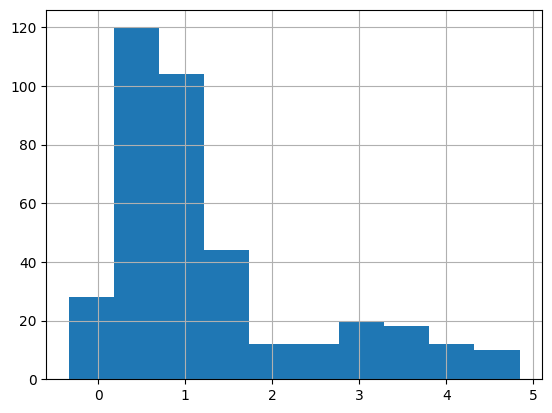

In [108]:
df['score'].hist()

In [ ]:
nt.

In [141]:
nt.show('test2.html')

In [85]:
def plot_nx(G):
    nx.draw(G, with_labels=True)
    pos = nx.spring_layout(G, seed=0)
    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
    plt.show() 

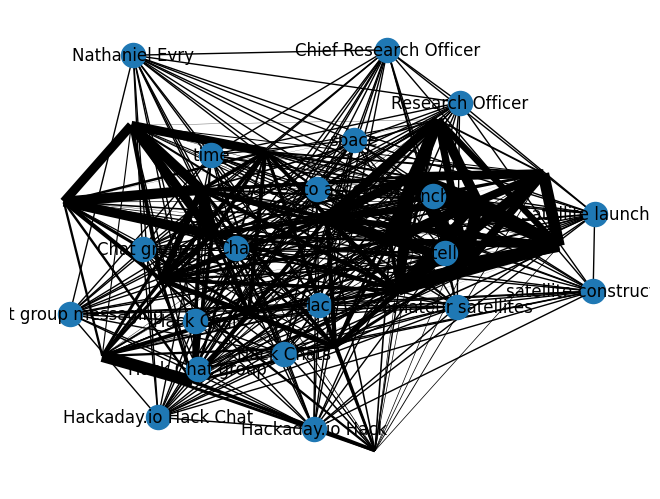

In [87]:
plot_nx(G)

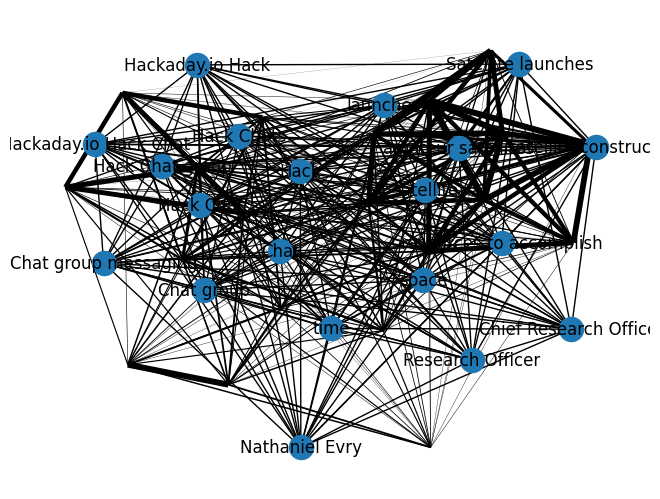

In [81]:
make_graph(text)